In [109]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [82]:
cellphone = pd.read_csv(r'C:\Users\Guhan Ramachandran\Google Drive\data Science\Machine Learning\test KNN\Cellphone.csv')

In [83]:
len(cellphone)

2000

In [84]:
cellphone

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [85]:
cellphone.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [86]:
cellphone.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
df = cellphone
df=df.rename(columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
                                   "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
                                   ,"px_height":"Pix Res Height","px_width":"Pix Res Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
                                   "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})

In [88]:
df.head(10)

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,...,Pix Res Height,Pix Res Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [89]:
df.describe()

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,...,Pix Res Height,Pix Res Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI,Price Range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Text(0.5, 1.0, 'Correlation ')

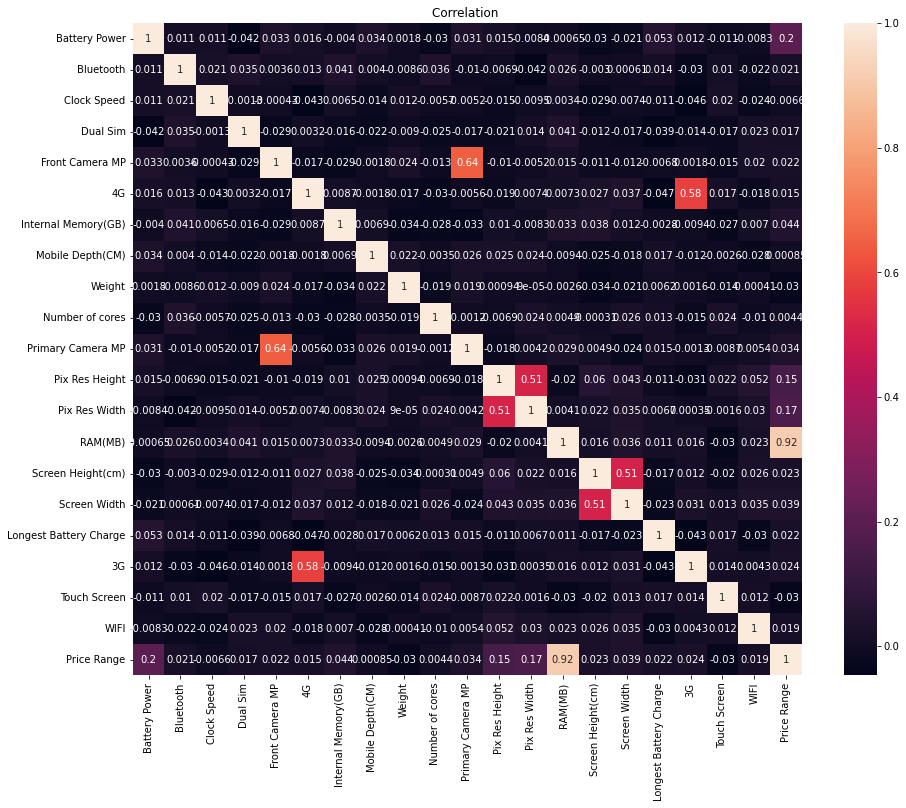

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
fig = plt.figure(figsize=(15,12))
map1 = sns.heatmap(data=corr,annot = True)
map1.set_title("Correlation ")

In [91]:
## Above we can see a correlation between pixel resolution width, pixel resolution height,3G,4G and the pixel cameras
## Also we can see a very hight possitive correlation with Ram

In [92]:
X= df.iloc[:, 0:20]
y= df.iloc[:,20]

In [93]:
X.head()

,Battery Power,Bluetooth,Clock Speed,Dual Sim,Front Camera MP,4G,Internal Memory(GB),Mobile Depth(CM),Weight,Number of cores,Primary Camera MP,Pix Res Height,Pix Res Width,RAM(MB),Screen Height(cm),Screen Width,Longest Battery Charge,3G,Touch Screen,WIFI
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [96]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3 )

In [98]:
k = 5
 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier()

In [100]:
y_pred = knn.predict(X_test)
y_pred

array([3, 3, 2, 1, 0, 3, 1, 0, 3, 1, 2, 3, 0, 3, 2, 0, 3, 0, 0, 1, 2, 1,
       1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 3, 3, 0, 2, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 0, 2, 3, 2, 2, 3,
       3, 1, 1, 0, 1, 0, 3, 2, 0, 1, 3, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 0,
       3, 1, 1, 0, 0, 0, 2, 3, 0, 3, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 3, 1,
       1, 2, 3, 1, 3, 1, 1, 1, 3, 2, 1, 2, 2, 1, 0, 1, 0, 0, 3, 2, 0, 2,
       1, 3, 2, 2, 3, 0, 0, 3, 2, 0, 1, 1, 1, 3, 1, 1, 0, 0, 2, 1, 1, 0,
       3, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 3, 2, 2, 0, 1,
       1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 2, 3, 1, 1, 2,
       1, 0, 2, 1, 2, 0, 2, 0, 1, 3, 3, 0, 3, 1, 1, 1, 1, 2, 0, 3, 2, 2,
       3, 1, 3, 0, 1, 1, 3, 2, 3, 1, 3, 0, 0, 0, 2, 3, 2, 0, 3, 3, 2, 0,
       2, 0, 0, 1, 0, 3, 3, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 2,
       1, 3, 1, 2, 2, 1, 3, 3, 1, 2, 0, 3, 2, 0, 0,

In [102]:
np.unique(y_pred)

array([0, 1, 2, 3], dtype=int64)

In [106]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[100,  32,   5,   2],
       [ 58,  67,  26,   6],
       [ 19,  49,  64,  17],
       [  2,  20,  47,  86]], dtype=int64)

In [110]:
accuracy_score(y_test,y_pred)

0.5283333333333333

In [135]:
k = 139 
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)


0.6866666666666666